In [ ]:
#Problem Statement
#Prepare a model for glass classification using KNN

In [9]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [10]:
glass=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\KNN\glass.csv")

In [11]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [12]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [15]:
glass['Type'] = glass['Type'].replace({1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',5:'containers',6:'tableware',7:'headlamps'})


In [16]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [17]:
array = glass.values
X = array[:, 0:9]
Y = array[:, -1]

In [20]:
num_folds = 10
kfold = KFold(n_splits=10)

In [21]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [22]:
print(results.mean())

0.42878787878787883


### Grid Search for Algorithm Tuning

In [23]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
array = glass.values
X = array[:, 0:9]
Y = array[:, -1]

In [25]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [31]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [32]:
# using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state = 23)

In [33]:
# creating or building a model
model = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean')
modelkn = model.fit(x_train,y_train)# fitting on a train data 

In [34]:
preds = modelkn.predict(x_test) # predicting on test data
preds

array(['headlamps', 'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'containers',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed', 'headlamps',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_float_processed', 'containers',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'bu

In [35]:
np.mean(preds==y_test)*100

76.74418604651163

In [36]:
# actual vs predicted
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
0,headlamps,headlamps
1,building_windows_float_processed,building_windows_float_processed
2,building_windows_float_processed,building_windows_float_processed
3,tableware,building_windows_non_float_processed
4,building_windows_float_processed,building_windows_float_processed
5,building_windows_non_float_processed,building_windows_non_float_processed
6,building_windows_float_processed,building_windows_float_processed
7,headlamps,headlamps
8,building_windows_float_processed,building_windows_float_processed
9,building_windows_float_processed,building_windows_float_processed


In [37]:
# model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(y_test,preds)
print(confusion_matrix)

[[13  0  0  0  0  0]
 [ 2 14  2  0  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  1  0  0  1  0]
 [ 3  0  0  0  0  0]]


In [38]:
print(classification_report(y_test,preds))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.72      1.00      0.84        13
building_windows_non_float_processed       0.93      0.74      0.82        19
                          containers       0.33      1.00      0.50         1
                           headlamps       1.00      0.80      0.89         5
                           tableware       0.33      0.50      0.40         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.77        43
                           macro avg       0.55      0.67      0.58        43
                        weighted avg       0.77      0.77      0.75        43



### Visualizing the CV results

In [28]:
import pandas as pd


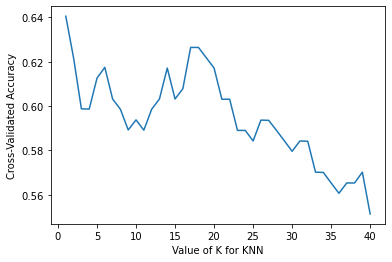

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
pd.DataFrame(k_scores).sort_values(0)

,0
39,0.551384
35,0.560687
36,0.565338
34,0.565338
37,0.565338
33,0.570100
38,0.570210
32,0.570210
29,0.579623
31,0.584164
